In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
encodings= ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

for encoding in encodings:
    try:
        data= pd.read_csv(r"H:\Data\......\spam.csv", encoding=encoding)
        print(f"file successfully read with encoding: {encoding}")
        break
    except Exception as e:
        print(f"an error occured: {e}, failed to read with encoding: {encoding}")

an error occured: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte, failed to read with encoding: utf-8
file successfully read with encoding: latin1


In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Dropping irrelevant columns.

In [5]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)
data.sample(5)

,v1,v2
3232,ham,Height of recycling: Read twice- People spend ...
5136,ham,There are some nice pubs near here or there is...
1357,ham,Good afternoon loverboy ! How goes you day ? A...
3878,ham,She left it very vague. She just said she woul...
3897,ham,Otherwise had part time job na-tuition..


Giving appropriate names to the columns.

In [6]:
data.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace= True)
data.sample(5)

,Target,Text
2987,ham,Do you still have the grinder?
1833,ham,When should I come over?
4742,ham,I am in hospital da. . I will return home in e...
4770,ham,Hi..i got the money da:)
3747,ham,"A bit of Ur smile is my hppnss, a drop of Ur t..."


In [7]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

Transforming 'Target' column to binary.

In [8]:
data['Target']= le.fit_transform(data['Target'])
data.sample(5)

,Target,Text
2657,0,Dai &lt;#&gt; naal eruku.
4659,0,You call him and tell now infront of them. Cal...
2061,0,Hey ! I want you ! I crave you ! I miss you ! ...
3357,0,I don't run away frm u... I walk slowly &amp; ...
256,0,Mmm so yummy babe ... Nice jolt to the suzy


In [9]:
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [10]:
data.duplicated().sum()

403

In [11]:
data= data.drop_duplicates(keep= 'first')
data.duplicated().sum()

0

## Exploratory data analysis

In [12]:
data.shape

(5169, 2)

In [13]:
data['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [14]:
import matplotlib.pyplot as plt

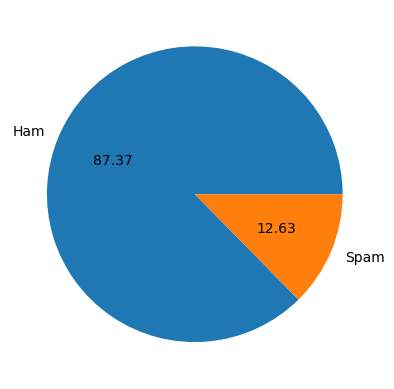

In [15]:
plt.pie(data['Target'].value_counts(), labels= ['Ham', 'Spam'], autopct= '%0.2f')
plt.show()

This is a very imbalanced data. Most of the data belongs to the 'Ham' category and very few belongs to the 'Spam'

In [16]:
data['NumCharacters']= data['Text'].apply(len)

In [17]:
import nltk

In [18]:
data['NumWords']= data['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
data.head()

,Target,Text,NumCharacters,NumWords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
data['NumSentenses']= data['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
data[['NumCharacters', 'NumWords', 'NumSentenses']].describe()

,NumCharacters,NumWords,NumSentenses
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [22]:
#Statistics for Ham
data[data['Target']==0][['NumCharacters', 'NumWords', 'NumSentenses']].describe()

,NumCharacters,NumWords,NumSentenses
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
#Statistics for spam
data[data['Target']==1][['NumCharacters', 'NumWords', 'NumSentenses']].describe()

,NumCharacters,NumWords,NumSentenses
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [24]:
import seaborn as sns

<AxesSubplot:xlabel='NumWords', ylabel='Count'>

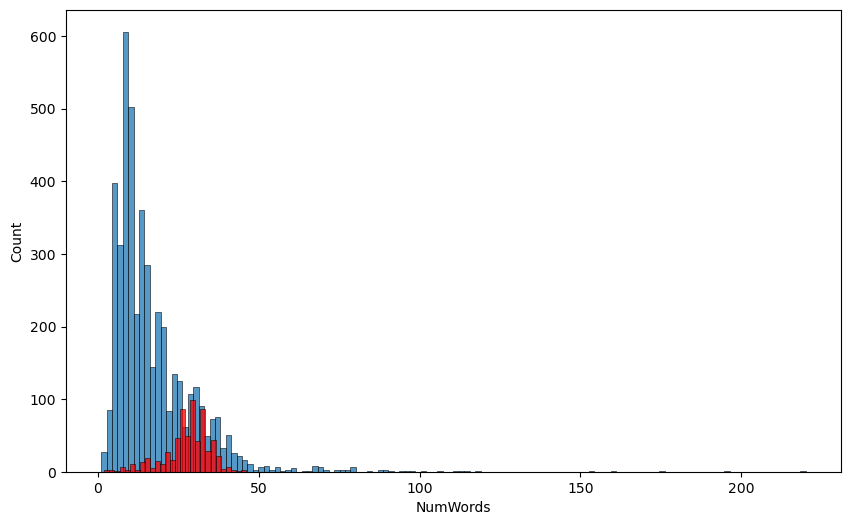

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['Target']==0]['NumWords'])
sns.histplot(data[data['Target']==1]['NumWords'], color='red')

A message classified as 'spam' have significantly lesser number of words in the message/mail as compared to the message classified as 'ham'.

<AxesSubplot:xlabel='NumCharacters', ylabel='Count'>

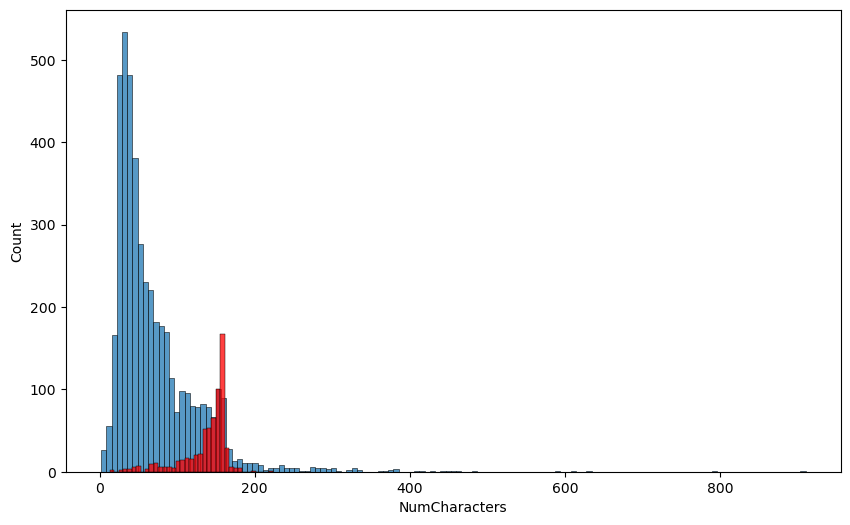

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['Target']==0]['NumCharacters'])
sns.histplot(data[data['Target']==1]['NumCharacters'], color='red')

Number of characters in a 'spam' messages are also very less as compared to the message classified as 'ham'.

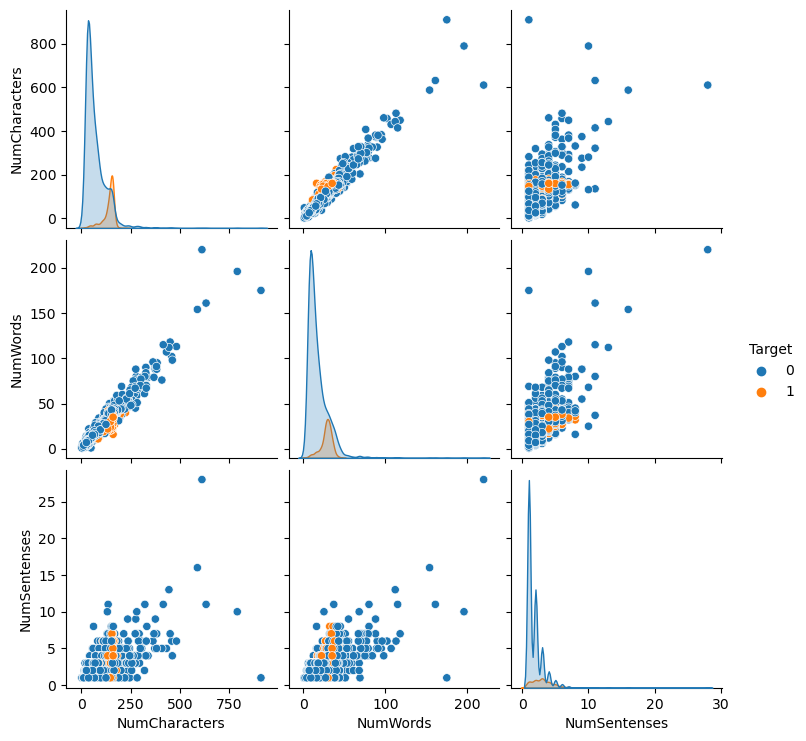

In [27]:
sns.pairplot(data, hue= 'Target')

<AxesSubplot:>

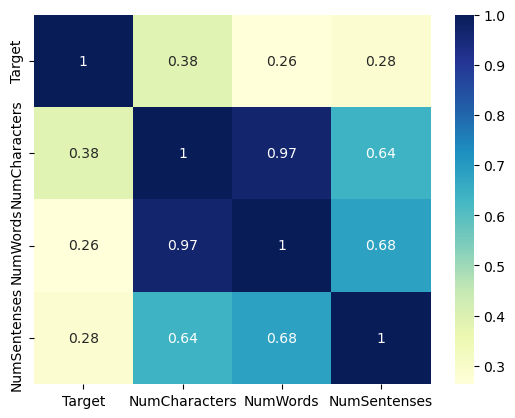

In [28]:
sns.heatmap(data.corr(), annot= True, cmap= 'YlGnBu')

## Data Preprocessing

In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [30]:
ps= PorterStemmer()

In [31]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text= y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text= y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [32]:
data['TransformedText']= data['Text'].apply(transform_text)

In [33]:
data.head()

,Target,Text,NumCharacters,NumWords,NumSentenses,TransformedText
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
spam_corpus= []
for msg in data[data['Target']==1]['TransformedText'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [35]:
len(spam_corpus)

9939

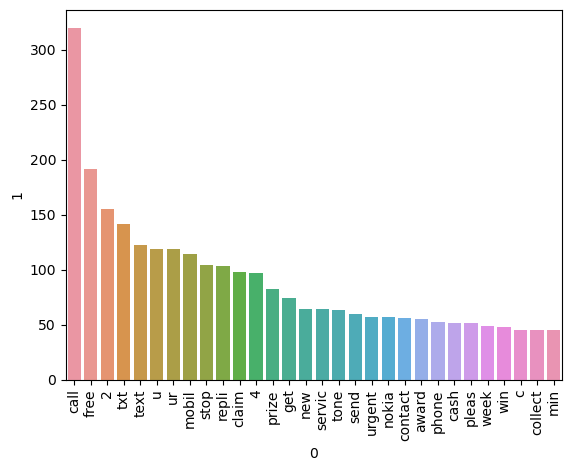

In [36]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical')
plt.show()

In [37]:
ham_corpus= []
for msg in data[data['Target']==0]['TransformedText'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

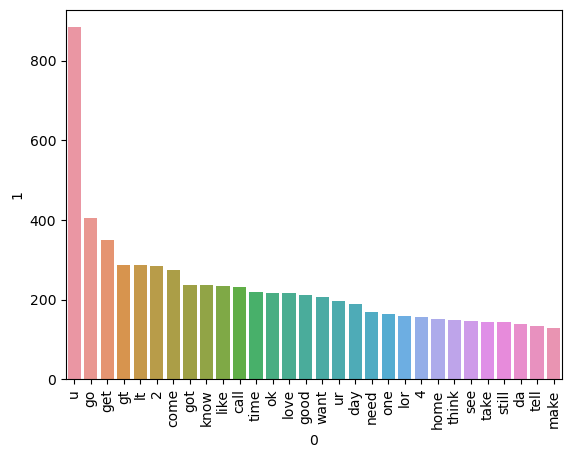

In [38]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical')
plt.show()

## Model Building

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [40]:
x= tfidf.fit_transform(data['TransformedText']).toarray()

In [41]:
y= data['Target'].values

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size= 0.8, random_state= 2)

In [44]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [45]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [46]:
gnb.fit(x_train, y_train)
gnb_predict= gnb.predict(x_test)
print(accuracy_score(y_test, gnb_predict))
print(confusion_matrix(y_test, gnb_predict))
print(precision_score(y_test, gnb_predict))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [47]:
mnb.fit(x_train, y_train)
mnb_predict= mnb.predict(x_test)
print(accuracy_score(y_test, mnb_predict))
print(confusion_matrix(y_test, mnb_predict))
print(precision_score(y_test, mnb_predict))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [48]:
bnb.fit(x_train, y_train)
bnb_predict= bnb.predict(x_test)
print(accuracy_score(y_test, bnb_predict))
print(confusion_matrix(y_test, bnb_predict))
print(precision_score(y_test, bnb_predict))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [50]:
svc= SVC(kernel= 'sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dt= DecisionTreeClassifier(max_depth=5)
lr= LogisticRegression(solver='liblinear', penalty= 'l1')
rf= RandomForestClassifier(n_estimators= 50, random_state=2)
abc= AdaBoostClassifier(n_estimators= 50, random_state=2)
bc= BaggingClassifier(n_estimators= 50, random_state=2)
etc= ExtraTreesClassifier(n_estimators= 50, random_state=2)
gdbc= GradientBoostingClassifier(n_estimators= 50, random_state=2)
xgb= XGBClassifier(n_estimators= 50, random_state=2)

In [51]:
clfs= {'SVC': svc,
      'KN': knc,
      'MN': mnb,
      'DT': dt,
      'LR': lr,
      'RF': rf,
      'ABC': abc,
      'BC': bc,
      'ET': etc,
      'GBC': gdbc,
      'XG': xgb}

In [52]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred= clf.predict(x_test)
    accuracy= accuracy_score(y_test, y_pred)
    precision= precision_score(y_test, y_pred)
    
    return accuracy,precision

## Model Evaluation

In [53]:
accuracies= []
precisions= []

for name, clf in clfs.items():
    
    current_accuracy, current_precision= train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print('For', name)
    print('Accuracy', current_accuracy)
    print('Precision', current_precision)
    
    accuracies.append(current_accuracy)
    precisions.append(current_precision)

For SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
For KN
Accuracy 0.9052224371373307
Precision 1.0
For MN
Accuracy 0.9709864603481625
Precision 1.0
For DT
Accuracy 0.9274661508704062
Precision 0.8118811881188119
For LR
Accuracy 0.9584139264990329
Precision 0.9702970297029703
For RF
Accuracy 0.9748549323017408
Precision 0.9827586206896551
For ABC
Accuracy 0.960348162475822
Precision 0.9292035398230089
For BC
Accuracy 0.9574468085106383
Precision 0.8671875
For ET
Accuracy 0.9748549323017408
Precision 0.9745762711864406
For GBC
Accuracy 0.9477756286266924
Precision 0.92
For XG
Accuracy 0.9661508704061895
Precision 0.9256198347107438


In [54]:
PerformanceDF= pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracies, 'Precision': precisions}).sort_values('Precision', ascending= False)

In [55]:
PerformanceDF

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,MN,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ET,0.974855,0.974576
4,LR,0.958414,0.970297
6,ABC,0.960348,0.929204
10,XG,0.966151,0.925620
9,GBC,0.947776,0.920000
7,BC,0.957447,0.867188


In [56]:
PerformanceDF1= pd.melt(PerformanceDF, id_vars= 'Algorithm')
PerformanceDF1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,MN,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ET,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,ABC,Accuracy,0.960348
7,XG,Accuracy,0.966151
8,GBC,Accuracy,0.947776
9,BC,Accuracy,0.957447


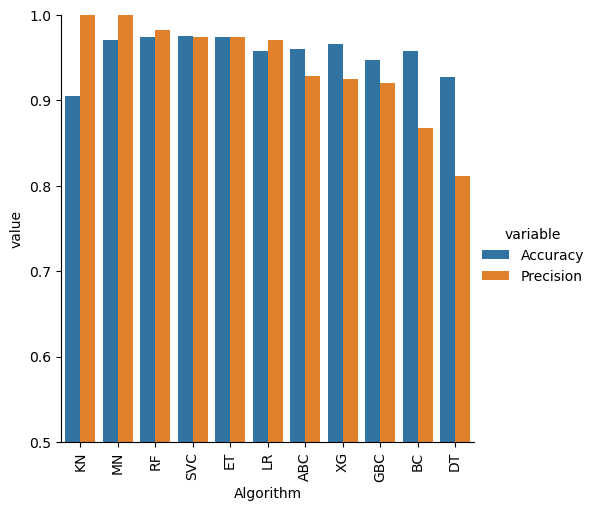

In [57]:
sns.catplot(x= 'Algorithm', y= 'value', hue= 'variable', data= PerformanceDF1, kind= 'bar', height= 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation= 'vertical')
plt.show()

Given that the Multinomial Naive Bayes classifier outperformed all other machine learning classifiers in terms of accuracy and performance metrics, we have selected it as our final model. Consequently, we will save this model using pickle for future use.

In [58]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))